In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [10]:
# Import my modules.
import sys, os
from pathlib import Path
current_dir = os.path.join(Path().resolve())
sys.path.append(str(current_dir) + '/../')

from modules import utils
from modules import models
from modules import preprocess

import importlib
for m in [utils, models, preprocess]:
    importlib.reload(m)

In [11]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
mbd = 'microbusiness_density'

In [12]:
df_train, df_test, df_subm = utils.load_dataset(subm='../submission/submission_2023-03-12_15_17_53.csv')
df_all, df_census = utils.merge_dataset(df_train, df_test, pop=False, unemploy=False, census=False, co_est=False, coord=False, 
                                        fix_pop=True, merge41=True, df_subm=df_subm, county=False, mbd_origin='before')

/tmp/working/code-analysis/../modules/utils.py:326: DtypeWarning: Columns (102) have mixed types.Specify dtype option on import or set low_memory=False.
  df_census = load_census(BASE)


merge scale=41 of df_submission to df_all.


In [13]:
df_all = df_all.reset_index()
df_subm = df_subm.reset_index().rename(columns={mbd:'mbd_pred'})
df_all = df_all.merge(df_subm, how='left', on='row_id')
df_all = df_all[df_all['scale']<=45].copy()
df_all.loc[df_all['scale']<=40, 'mbd_pred'] = np.nan

In [14]:
adult2020 = df_census.set_index('cfips')['adult_2020'].to_dict()
adult2021 = df_census.set_index('cfips')['adult_2021'].to_dict()
df_all['adult2020'] = df_all['cfips'].map(adult2020)
df_all['adult2021'] = df_all['cfips'].map(adult2021)
idx = df_all[mbd].isna()
df_all.loc[idx, mbd] = df_all.loc[idx, 'mbd_pred'] * df_all.loc[idx, 'adult2021'] / df_all.loc[idx, 'adult2020']
df_all = df_all.drop(['adult2020', 'adult2021'], axis=1)

In [15]:
dict_county = df_all[['cfips', 'county', 'state']].drop_duplicates().set_index('cfips').to_dict()

def plot_mbd_with_active(cfips_list, pred_m=1):
    n = len(cfips_list)

    column = 4
    row = math.ceil(n / 4)
    fig, axes = plt.subplots(row, column, tight_layout=True, figsize=(column*5,row*6))
    axes = axes.ravel()

    for i in range(n):
        ax = axes[i]

        cfips = cfips_list[i]
        df = df_all[df_all['cfips']==cfips]
        xlabel = f'{cfips}_{dict_county["county"][cfips]}_{dict_county["state"][cfips]}'
        lastactive = df['active'][df['scale']==40].values[0]

        sns.lineplot(x='scale', y=mbd,  data=df, ax=ax, label='mbd')
        ax.axvline(x=41, ymin=0, ymax=3)
        if pred_m:
            sns.lineplot(x='scale', y=f'mbd_pred', data=df, ax=ax, label=f'pred{pred_m}')
        ax.set_xlabel(xlabel, fontsize=12)
        ax.legend(loc='upper left')
        ax.text(0.04, 0.85, f'active = {lastactive}', transform=ax.transAxes, fontsize=12)
    
    plt.show()

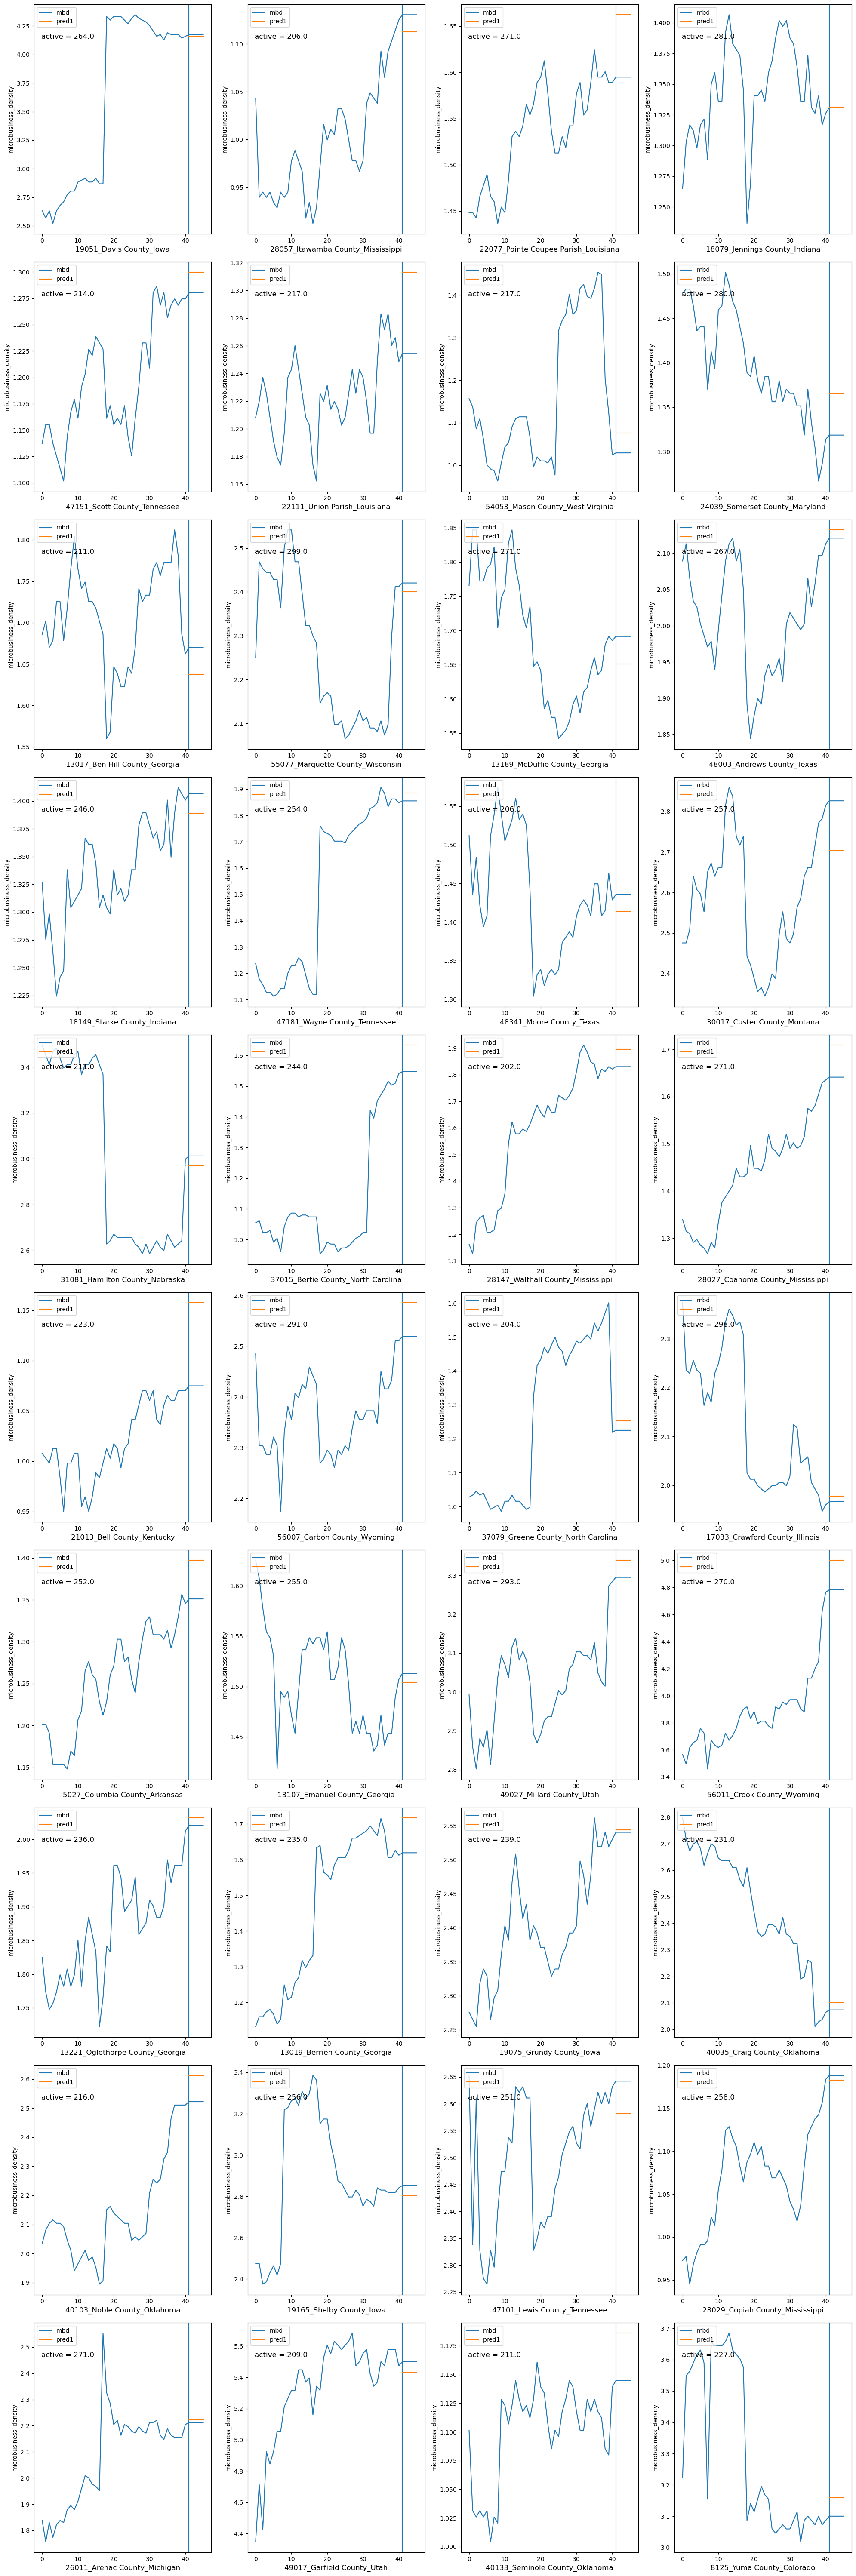

In [16]:
# 1000~2000
plot_mbd_with_active([19051,
 28057,
 22077,
 18079,
 47151,
 22111,
 54053,
 24039,
 13017,
 55077,
 13189,
 48003,
 18149,
 47181,
 48341,
 30017,
 31081,
 37015,
 28147,
 28027,
 21013,
 56007,
 37079,
 17033,
 5027,
 13107,
 49027,
 56011,
 13221,
 13019,
 19075,
 40035,
 40103,
 19165,
 47101,
 28029,
 26011,
 49017,
 40133,
 8125])

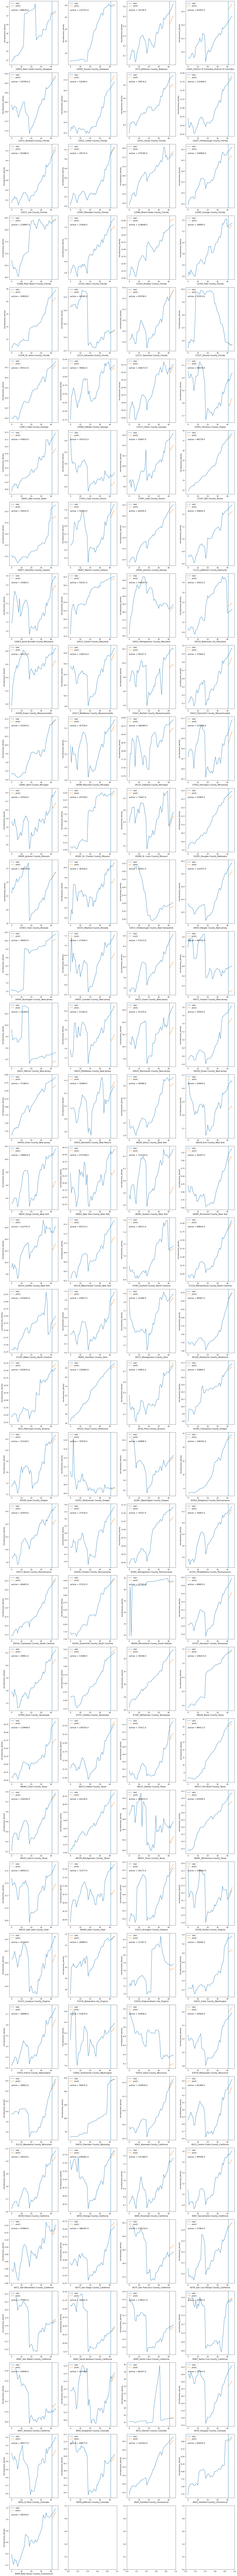

In [17]:
#トレンドの群
trend_active25000 = [10003, 10005,  1073, 11001, 12011, 12021, 12031, 12057, 12071,
       12081, 12086, 12095, 12099, 12101, 12103, 12105, 12109, 12115,
       12117, 12127, 13067, 13089, 13121, 15003, 16001, 17031, 17097,
       17197, 18057, 18097, 20091, 21111, 24003, 24013, 24031, 24510,
       25009, 25017, 25021, 25023, 26081, 26099, 26125, 27053, 29095,
       29183, 29189, 31055, 32003, 32031, 33011, 34003, 34005, 34007,
       34013, 34017, 34021, 34023, 34025, 34029, 34039, 35001, 36005,
       36029, 36047, 36061, 36081, 36085, 36103, 36119, 37081, 37119,
       37183, 39061, 39113, 40109,  4013, 40143,  4019, 41005, 41039,
       41051, 41067, 42003, 42017, 42029, 42091, 42101, 45019, 45045,
       46099, 47037, 47093, 47157, 47187, 48029, 48085, 48113, 48121,
       48157, 48201, 48339, 48453, 48491, 49035, 49049, 51013, 51059,
       51107, 51510, 51810, 53011, 53053, 53061, 55025, 55079, 55133,
       56033,  6001,  6013,  6019,  6059,  6065,  6067,  6071,  6073,
        6075,  6079,  6081,  6083,  6085,  6087,  6097,  8005,  8031,
        8035,  8041,  8059,  9001,  9003,  9009]

plot_mbd_with_active(trend_active25000)

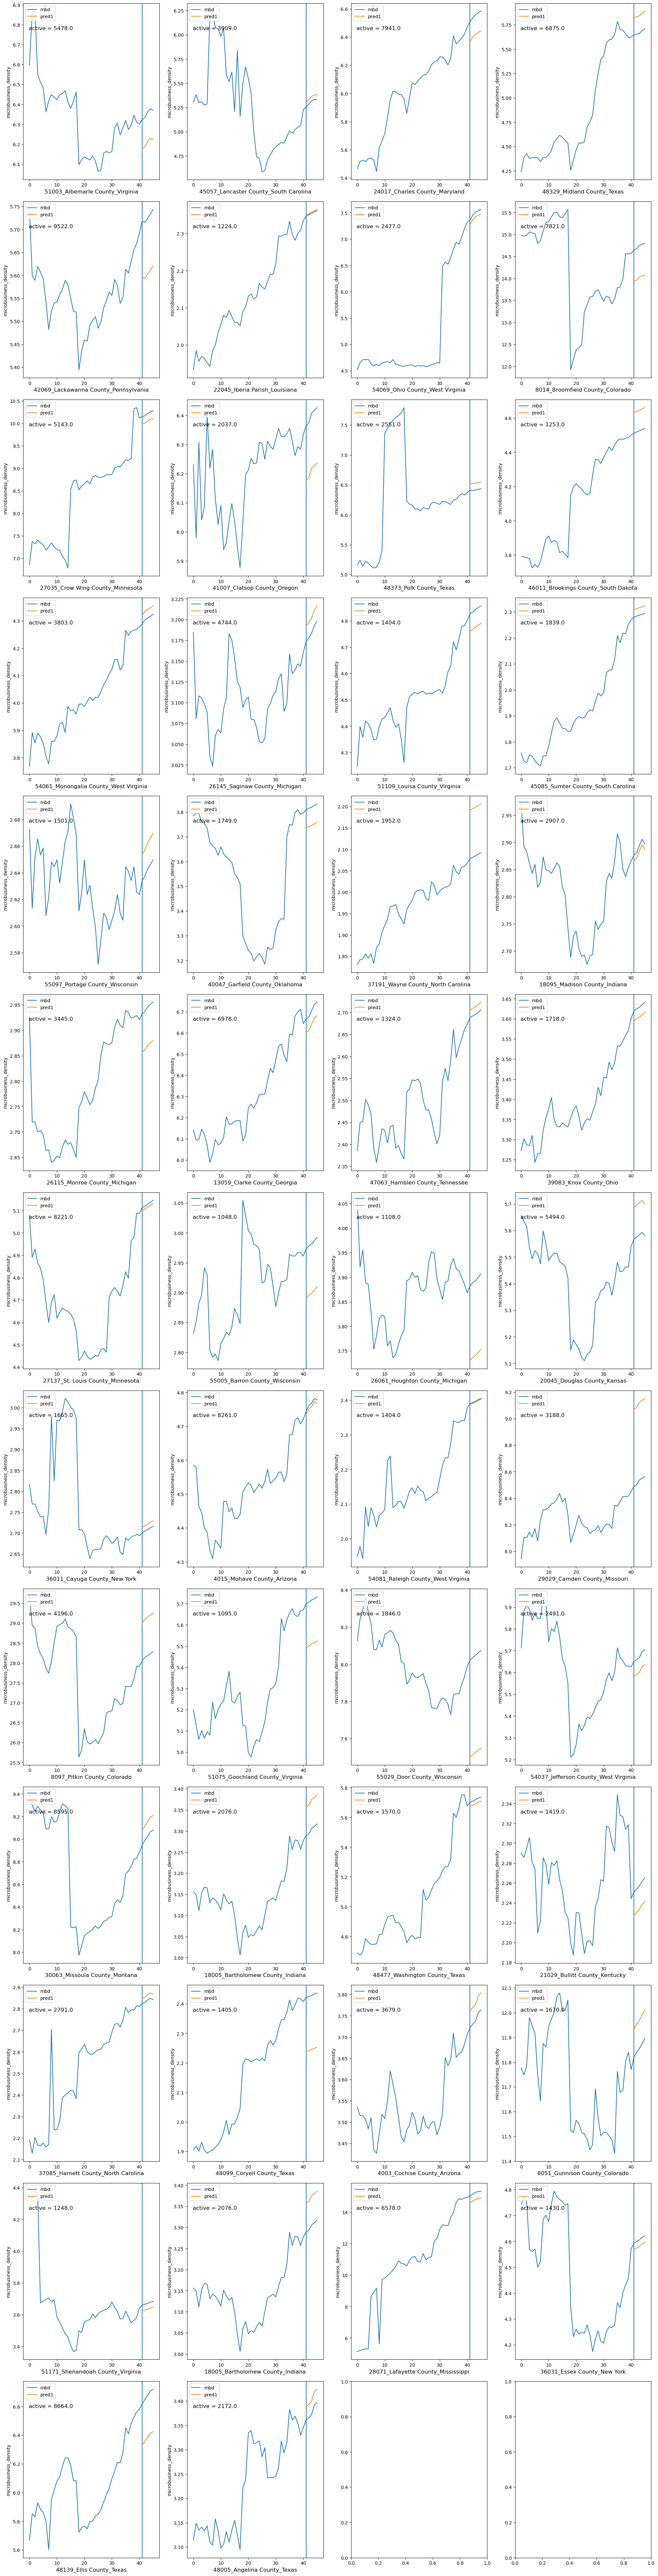

In [18]:
# active 1000 to 10000のランダム
random_list = [51003, 45057, 24017, 48329, 42069, 22045, 54069, 8014, 27035, 41007, 48373, 46011, 54061, 26145, 51109, 45085, 55097, 40047,
 37191, 18095, 26115, 13059, 47063, 39083, 27137, 55005, 26061, 20045, 36011, 4015, 54081, 29029, 8097, 51075, 55029, 54037, 30063, 18005,
 48477, 21029, 37085, 48099, 4003, 8051, 51171, 18005, 28071, 36031, 48139, 48005]

plot_mbd_with_active(random_list)